<a href="https://colab.research.google.com/github/narutaku0914/KIKAGAKU/blob/master/kikagaku_ML1regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **重回帰分析の実装**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# データセットの読み込み
from sklearn.datasets import load_boston
dataset = load_boston()
x, t = dataset.data, dataset.target   # 目標値(Target) t
columns = dataset.feature_names

In [ ]:
type(x), x.shape, type(t), t.shape # データセットの型確認

(numpy.ndarray, (506, 13), numpy.ndarray, (506,))

In [ ]:
df = pd.DataFrame(x, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# 目標値追加
df['Target'] = t
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [ ]:
# 入力変数と目的変数(モデルの学習に用いるためのデータと、学習後のモデルのパフォーマンスをテストするために用いるデータ)の切り分け
t = df['Target'].values
x = df.drop(labels=['Target'], axis=1).values  # axis=1: 列方向

In [ ]:
# ホールドアウト法 (holdout method) 
from sklearn.model_selection import train_test_split

# 2つに分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

テスト用データを全体の３０％                          
random_state = seed

# モデルの学習、検証

In [ ]:
# 1; モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# 2; モデルの学習
model.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 学習後のパラメータ w
model.coef_  

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

★重回帰分析では、重み w とバイアス b の ２ つがパラメータ   
求まった重み w の値は model.coef_ 属性に、バイアス b の値は model.intercept_ 属性に格納

In [ ]:
model.intercept_

37.93710774183309

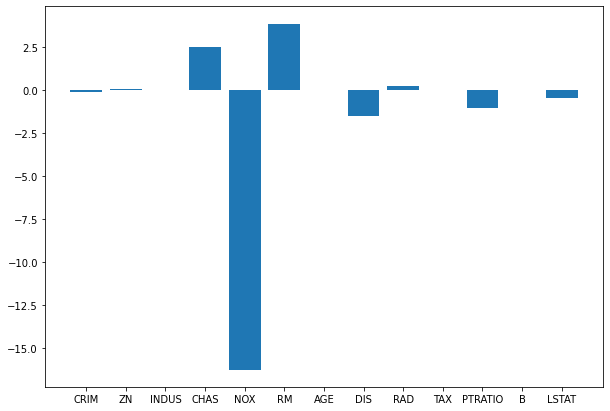

In [ ]:
# パラメータの分布をヒストグラムで可視化
%matplotlib inline
plt.figure(figsize=(10, 7))
plt.bar(x=columns, height=model.coef_);

In [ ]:
# 3; モデルの検証
print('train score: ', model.score(x_train, t_train))
print('test score: ', model.score(x_test, t_test))

train score:  0.7645451026942549
test score:  0.6733825506400171


入力変数と目的変数を与えると学習済みのモデルを用いて計算した決定係数 (coefficient of determination) という指標を返す

使用するデータセットのサンプルサイズを N、n 個目の入力値に対する予測値を y_n、目標値を t_n、そしてそのデータセット内の全ての目標値の平均値を bar t
​​  としたとき、

\begin{array}{c} R^2 = 1 - \frac{\sum_{n=1}^{N} (t_n - y_n)^2}{\sum_{n=1}^{N} (t_n - \bar t)^2} \end{array}
​​ 

で表される指標 → 1に近ければ良い

In [ ]:
# 推論
y = model.predict(x_test)  # predict; 学習が終わったモデルに、新たな入力値を与えて予測値を計算(推論)

In [ ]:
print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  24.935707898576915
目標値:  22.6


 # 過学習を抑制する手法

In [ ]:
# Ridge回帰 L2ノルム(原点から点までの長さ)正則化

# モデルの定義, ハイパーパラメータの値設定
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

In [ ]:
# モデルの学習
ridge.fit(x_train, t_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
# モデルの検証
print('train score: ', ridge.score(x_train, t_train))
print('test score: ', ridge.score(x_test, t_test))

train score:  0.7623440182689594
test score:  0.6665819091486688


回帰前と変わらない

Text(0.5, 1.0, 'Ridge Regression')

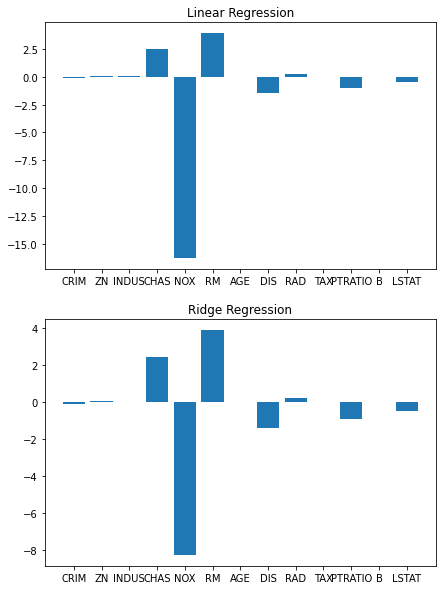

In [ ]:
fig = plt.figure(figsize=(7, 10))

# 重回帰
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# Ridge回帰
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x=columns, height=ridge.coef_)
ax2.set_title('Ridge Regression')

予測性能に大きな変化は無かったですが、重回帰分析に比べて特定の入力変数に過剰に適合していないことがわかる　<br>正則化項の \alphaα の値を調整することによって、パラメータが調整される幅にどのように変化があるか確かめてみて

In [ ]:
# Lasso L1正則化
'''
Lasso 回帰の特徴として不要な入力変数を特定し、該当する重み w を 0 にする事で
実質的に入力変数の種類を減らすことが出来る。
このとき生成される重み w のベクトル w は 0を多く含み、これをスパース性があると表現
'''

# モデルの定義
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)

# モデルの学習
lasso.fit(x_train, t_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
# 検証
print('train score: ', lasso.score(x_train, t_train))
print('test score: ', lasso.score(x_test, t_test))

train score:  0.7084095500978869
test score:  0.6115433359595555


In [ ]:
# どの程度スパースになっているのか確認
# 0になっていない特徴量の数
print('元の特徴量の数: ', x.shape[1])
print('Lassoの特徴量: ', np.sum(lasso.coef_ != 0)) # 重み(lasso.coef_)がゼロでない特徴量の数

元の特徴量の数:  13
Lassoの特徴量:  10


In [ ]:
# αを変更してみる
lasso_005 = Lasso(alpha=0.05)
lasso_005.fit(x_train, t_train)

print('train score: ', lasso_005.score(x_train, t_train))
print('test score: ', lasso_005.score(x_test, t_test))

train score:  0.7548928631432029
test score:  0.6541502573235292


In [ ]:
# 0になっていない特徴量の数
print('元の特徴量の数: ', x.shape[1])
print('Lassoの特徴量: ', np.sum(lasso_005.coef_ != 0))

元の特徴量の数:  13
Lassoの特徴量:  12


Text(0.5, 1.0, 'Lasso Regression 0.05')

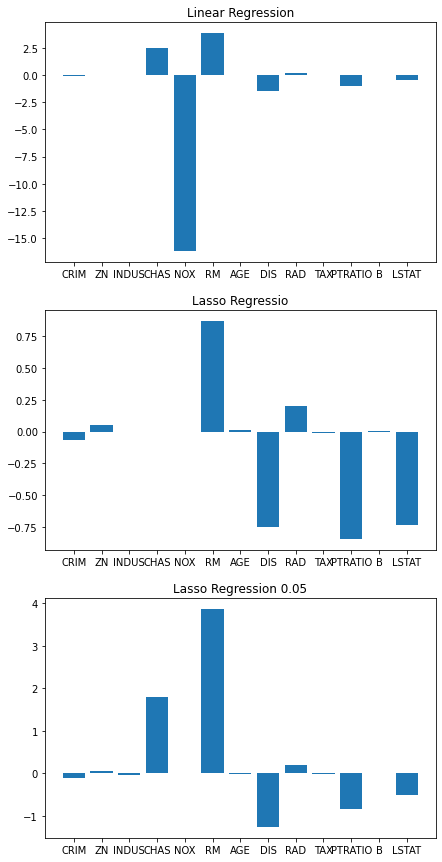

In [ ]:
fig = plt.figure(figsize=(7, 15))

# 重回帰
ax1 = fig.add_subplot(3, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# Ridge回帰
ax2 = fig.add_subplot(3, 1, 2)
ax2.bar(x=columns, height=lasso.coef_)
ax2.set_title('Lasso Regressio')

# α=0.05
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(x=columns, height=lasso_005.coef_)
ax3.set_title('Lasso Regression 0.05')

いくつかの入力変数に紐づく重み w が 0 になっている。<br> Lasso 回帰の特長によって不要な入力変数を減らすことが出来ている

# 相関関係と多重共線性問題

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving regression_pls.csv to regression_pls.csv


In [ ]:
df = pd.read_csv('regression_pls.csv')
df.head(3)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,9.222222,-0.333333,9.222222,0.333333,2.803039,29.019550,3.577350,2.485599,2.485599,1.732051,0.992799,0.992799,0.610650,0.610650,0.0,0.0,0.0,0.0,-0.53,3.245112,3.47,0.874858,1.156009,24.605606,5.733667,0.0,0.0,5.90718,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,4.597222,1.652778,4.597222,1.652778,1.632993,2.754888,2.707107,2.077350,2.077350,1.414214,0.788675,0.788675,0.288675,0.288675,0.0,0.0,0.0,0.0,-0.08,2.754888,2.92,1.920000,1.920000,19.599140,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,9.000000,-0.833333,9.000000,0.833333,2.803039,27.019550,3.577350,2.355462,2.355462,1.732051,0.927731,0.927731,0.519018,0.519018,0.0,0.0,0.0,0.0,-0.53,3.245112,3.47,0.874858,1.156009,24.059949,5.106527,0.0,0.0,0.00000,5.969305,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(1290, 197)

In [ ]:
# データの切り分け -> ndarrayに変換
# 目的変数は y の列が該当し、その他の列が入力変数に該当
x = df.drop('Target', axis=1).values
t = df['Target'].values

print(x.shape, t.shape)

(1290, 196) (1290,)


In [ ]:
# 学習用データとテスト用の分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# モデルの学習
model.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 検証
print('tarin: ', model.score(x_train, t_train))
print('test: ', model.score(x_test, t_test))

tarin:  0.9365472506823411
test:  0.003576724162620226


今回は入力変数同士の相関が強いものが含まれており、多重共線性 (Multicollinearity) という問題が起こっているため

In [ ]:
# 相関関係の算出
df_corr = df.corr()  # corr: 相関係数
df_corr.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
Target,1.000000,-0.642326,-0.648078,-0.640489,-0.524453,NaN,0.111829,-0.360696,0.357026,0.113189,0.120581,0.000857,0.120581,-0.041054,0.242124,-0.580994,-0.542549,-0.507630,-0.642483,-0.564949,-0.513403,-0.618307,-0.463702,-0.578392,-0.438530,-0.564784,-0.413814,-0.513309,0.094017,-0.006027,-0.545639,-0.443932,0.044308,-0.646469,0.154438,0.013626,-0.037061,0.006903,-0.005276,0.056936,...,0.042022,NaN,0.051129,0.040172,NaN,-0.025653,-0.072149,-0.037616,NaN,0.023078,0.032735,0.077361,0.016323,-0.040499,-0.057758,-0.008723,0.035584,0.018014,0.018190,0.005723,0.036773,0.031990,-0.007879,-0.007879,0.026783,0.009903,0.139720,NaN,0.077135,NaN,-0.032287,-0.015204,0.019244,-0.047169,NaN,0.007788,NaN,0.002448,-0.113820,0.043600
x1,-0.642326,1.000000,0.997571,0.999978,0.908895,NaN,0.322508,-0.117193,0.134074,0.298204,0.378471,-0.446958,0.378471,-0.325579,-0.379325,0.826032,0.917214,0.839511,0.958681,0.897730,0.806413,0.920030,0.769137,0.891201,0.727455,0.849144,0.691114,0.791774,-0.273404,0.141811,0.919389,0.625024,-0.036254,0.963424,0.404151,0.374632,0.336265,0.236017,0.190516,0.173351,...,-0.002709,NaN,-0.000935,0.026399,NaN,-0.003994,0.281489,0.223386,NaN,0.063059,0.092263,-0.017745,0.012475,0.040538,0.057492,0.008293,-0.038473,-0.002359,0.003260,0.040122,0.058011,0.057891,0.041460,0.041460,0.113452,0.091384,-0.051005,NaN,-0.018761,NaN,0.051291,0.186110,0.027947,-0.002219,NaN,0.001304,NaN,-0.015226,-0.038657,0.027857
x2,-0.648078,0.997571,1.000000,0.997252,0.883891,NaN,0.322631,-0.097297,0.115794,0.294947,0.363786,-0.450551,0.363786,-0.319195,-0.357903,0.824275,0.896737,0.804689,0.939308,0.876898,0.768288,0.895849,0.730398,0.870423,0.690865,0.828501,0.655833,0.768028,-0.262938,0.135670,0.896056,0.593068,-0.038111,0.949110,0.384875,0.372437,0.331094,0.236464,0.197357,0.169223,...,-0.003175,NaN,0.001846,0.028212,NaN,-0.002583,0.261522,0.206505,NaN,0.062154,0.089649,-0.019194,0.017884,0.047381,0.063376,0.014535,-0.037313,-0.001110,0.003772,0.039323,0.062766,0.062354,0.040349,0.040349,0.103111,0.088279,-0.050473,NaN,-0.016456,NaN,0.047416,0.191792,0.029659,-0.007914,NaN,0.005912,NaN,-0.015106,-0.062823,0.027773
x3,-0.640489,0.999978,0.997252,1.000000,0.910855,NaN,0.324352,-0.120477,0.137237,0.300415,0.380881,-0.448158,0.380881,-0.326151,-0.380865,0.827493,0.919039,0.842162,0.959551,0.899754,0.809110,0.921333,0.771673,0.891888,0.729801,0.849932,0.693339,0.792980,-0.277540,0.142260,0.920606,0.626088,-0.036321,0.964277,0.406880,0.375913,0.337577,0.236775,0.191539,0.174963,...,-0.002421,NaN,-0.000600,0.026821,NaN,-0.003942,0.282915,0.224573,NaN,0.063426,0.092957,-0.017632,0.012337,0.040995,0.057908,0.008511,-0.038380,-0.002252,0.003341,0.041033,0.058610,0.058458,0.041700,0.041700,0.114118,0.091509,-0.050671,NaN,-0.018359,NaN,0.051542,0.186772,0.028046,-0.002001,NaN,0.001447,NaN,-0.015093,-0.038138,0.028359
x4,-0.524453,0.908895,0.883891,0.910855,1.000000,NaN,0.385792,-0.284647,0.293981,0.382603,0.506428,-0.469375,0.506428,-0.377003,-0.457913,0.857233,0.995378,0.979624,0.967419,0.985270,0.957137,0.950796,0.918905,0.888135,0.867811,0.856348,0.824709,0.826199,-0.487143,0.166676,0.968324,0.683917,-0.033967,0.974761,0.530507,0.418144,0.396599,0.252044,0.206133,0.242561,...,0.012716,NaN,0.012394,0.046139,NaN,-0.007132,0.371815,0.301336,NaN,0.080538,0.131901,-0.007529,-0.014482,0.053670,0.068658,0.011211,-0.031869,-0.000622,0.006972,0.078303,0.063193,0.066277,0.046719,0.046719,0.154646,0.097796,-0.026376,NaN,-0.001114,NaN,0.044125,0.174983,0.022996,0.018780,NaN,-0.010834,NaN,-0.016378,0.027813,0.055553


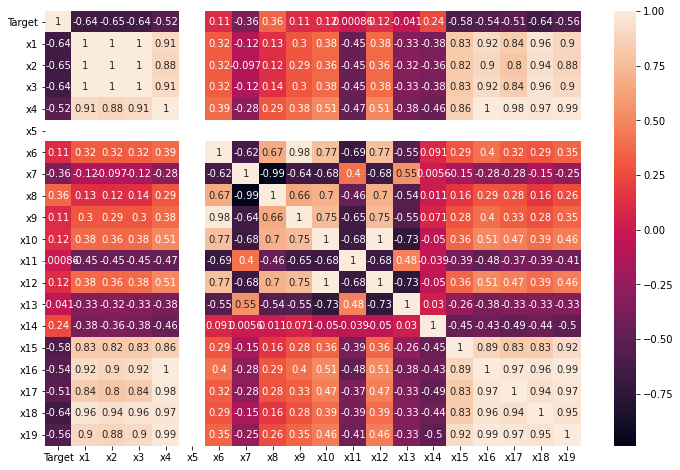

In [ ]:
# 上をHeatmap化
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.iloc[:20, :20], annot=True)

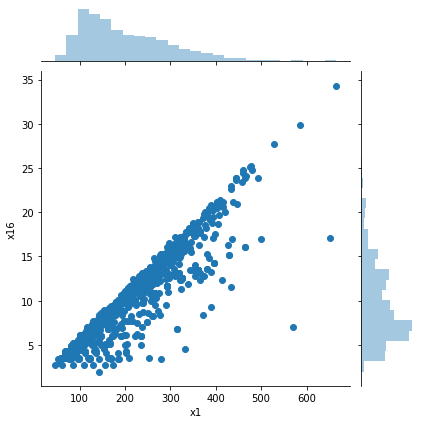

In [ ]:
sns.jointplot(x='x1', y='x16', data=df)

単純に相関の高い入力変数をデータセットから地道に取り除くアプローチも考えられるが、今回はモデル側でこの問題を解決できないか試す。

Partial Least Squares (PLS)

1. 入力値と目標値の共分散が最大になるように主成分を抽出

2. 抽出された主成分に対して重回帰分析を用いてモデルの学習を行う


教師なし学習で紹介する主成分分析と似た概念<br>
主成分分析：　100 個の特徴量があった場合にその特徴量の数を分散を用いて 10 や 20 個などに削減する手法（次元削減）<br>
PLS との違いは教師あり学習と教師なし学習で、主成分を抽出するときに目標値の情報を使うか使わないか

In [ ]:
# モデルの定義　(n_components:7)
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=7)

In [ ]:
# モデルの学習
pls.fit(x_train, t_train)

PLSRegression(copy=True, max_iter=500, n_components=7, scale=True, tol=1e-06)

In [ ]:
# モデルの検証
print('train score: ', pls.score(x_train, t_train))
print('test score: ', pls.score(x_test, t_test))

train score:  0.906376310202351
test score:  0.738728147180732
